## Numerical Derivatives
There are different ways to solve a derivative numerically. The first algorithms are known as finite difference methods and originate from the Taylor Series Expansion. The formal definition of a derivative and Taylor Series are shown below

\begin{equation}
f'(x) =  \lim_{x\to 0}\frac{f(x+h) - f(x)}{h}
\end{equation}

\begin{equation}
f(x+h) = f(x) + hf'(x) + h^2\frac{f''(\xi)}{2!}
\end{equation}

Upon rearranging this expression, we get the forward difference scheme along with an estimation of the scheme's error. 

\begin{equation}
\frac{f(x+h) - f(x)}{h} - f'(x) = h\frac{f''(\xi)}{2}
\end{equation}

This quotient can be defined as an approximation for f'(x) and can be implemented numerically through the following equation 

\begin{equation}
\frac{f(x+h) - f(x)}{h}
\end{equation}

as h gets smaller, the approximation becomes more precise. 
There are different finite algorithms, that all originate from rearranging the original difference quotient and Taylor Series Expansion.  The two schemes below are first order algorithms and have an order of O(h) or O($\Delta$x)

\begin{equation}
    Forward: \frac{f(x+\Delta x) - f(x)}{\Delta x}
\end{equation}

Rearraging, gives the backwards difference

\begin{equation}
    Backwards: \frac{f(x) - f(x-\Delta x)}{\Delta x}
\end{equation}

The Taylor Series can be combined with other expansions to produce higher order approximations. We can expand our order by the formulas below. 

\begin{equation}
    f(x + \Delta x) = f(x) + \Delta xf'(x) + \Delta x^2 \frac{f''(x)}{2!} + \Delta x^3 \frac{f'''(\xi_1)}{3!}
\end{equation}

\begin{equation}
   f(x - \Delta x) = f(x) - \Delta xf'(x) + \Delta x^2 \frac{f''(x)}{2!} - \Delta x^3 \frac{f'''(\xi_2)}{3!}
\end{equation}

When the two expressions are subtracted from one another, the below expression is obtained

\begin{equation}
   f(x + \Delta x) - f(x - \Delta x) = 2\Delta xf'(x) + \Delta x^3 \frac{f'''(\xi_1) + f'''(\xi_2)}{12}
\end{equation}

This equation is able to be represented numerically by the expression below and is of the order O($h^2$) or O($\Delta x^2$)
\begin{equation}
      Central: \frac{f(x + \Delta x) - f(x - \Delta x)}{2\Delta x}
\end{equation}


In [3]:
#finite difference 
#defining the three methods in python

def forward(f, x, dx):
    return (f(x+dx)-f(x))/dx

def backwards(f, x, dx):
    return (f(x) - f(x-dx))/dx

def central(f, x, dx):
    return (f(x+dx)-f(x-dx))/(2*dx)


In [20]:
#A few simple examples

print("f(x) = e^x")
print("approx: ", central(np.exp, 1, 1e-5))
print("real: ", np.exp(1))
print( '' )

print("f(x) = sinx")
print("approx: ", central(np.sin, np.pi/4, 1e-5))
print("real: ", np.cos(np.pi/4))
print( '' )

print("f(x) = cosx")
print("approx: ", central(np.cos, np.pi/4, 1e-5))
print("real: ", -np.sin(np.pi/4))
print( '' )

f(x) = e^x
approx:  2.718281828517632
real:  2.718281828459045

f(x) = sinx
approx:  0.7071067811725839
real:  0.7071067811865476

f(x) = cosx
approx:  -0.7071067811670327
real:  -0.7071067811865475



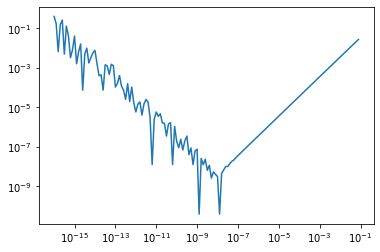

In [10]:
#lets look at the derivative of sin, evaluated at different values -> pi/4, etc..
import numpy as np
import matplotlib.pyplot as plt

dxVal1 = [] # will hold different dx values
yVal1  = [] # will hold the approximated derivative
x= np.pi/4

for dx in 10**np.arange(-16, -1, 0.1):
    y = forward(np.cos, x, dx)
    dxVal1.append(dx)
    yVal1.append(y)
    
# for i in range(0, len(dxVal)):
#     print('Real: ', -np.sin(np.pi/4))
#     print('dx: ', dxVal[i], ' Approximation: ', yVal[i])
#     print(' ')

plt.loglog(dxVal1, abs(yVal1--np.sin(np.pi/4)))   

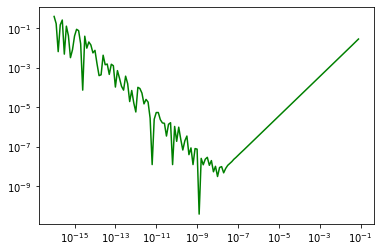

In [11]:
dxVal2 = [] # will hold different dx values
yVal2  = [] # will hold the approximated derivative
x= np.pi/4

for dx in 10**np.arange(-16, -1, 0.1):
    y = backwards(np.cos, x, dx)
    dxVal2.append(dx)
    yVal2.append(y)
    
# for i in range(0, len(dxVal)):
#     print('Real: ', -np.sin(np.pi/4))
#     print('dx: ', dxVal[i], ' Approximation: ', yVal[i])
#     print(' ')

plt.loglog(dxVal2, abs(yVal2--np.sin(np.pi/4)), color = 'green')

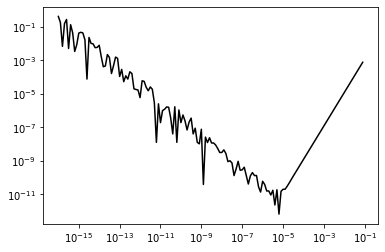

In [12]:
dxVal3 = [] # will hold different dx values
yVal3  = [] # will hold the approximated derivative
x= np.pi/4

for dx in 10**np.arange(-16, -1, 0.1):
    y = central(np.cos, x, dx)
    dxVal3.append(dx)
    yVal3.append(y)
    
# for i in range(0, len(dxVal)):
#     print('Real: ', -np.sin(np.pi/4))
#     print('dx: ', dxVal[i], ' Approximation: ', yVal[i])
#     print(' ')

plt.loglog(dxVal3, abs(yVal3--np.sin(np.pi/4)), color = 'black')

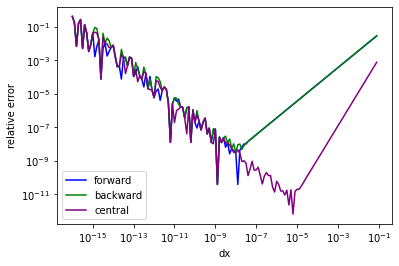

In [13]:
#plotting all three graphs together
plt.loglog(dxVal1, abs(yVal1--np.sin(np.pi/4)), color = 'blue', label = 'forward')
plt.loglog(dxVal2, abs(yVal2--np.sin(np.pi/4)), color = 'green', label = 'backward')
plt.loglog(dxVal3, abs(yVal3--np.sin(np.pi/4)), color = 'purple', label = 'central')
plt.ylabel('relative error')
plt.xlabel('dx')
plt.legend()

To calculate the second derivative and any higher orders, you apply the finite difference scheme n- amount of times. Below is an example of the second derivative of cosine using the central difference. 

\begin{equation}
y''(x)=\frac{y'(x+\Delta x/2)-y'(x-\Delta x/2)}{\Delta x}=\frac{[y(x+\Delta x)-y(x)]-[y(x)-y(x-\Delta x)]}{\Delta x^2}=\frac{y(x+\Delta x)+y(x-\Delta x)-2y(x)}{\Delta x^2}
\end{equation}

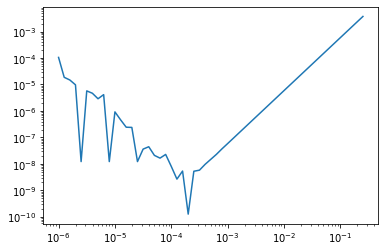

In [14]:
def CDsecond(y,x,dx):
        return (y(x+dx)+y(x-dx)-2*y(x))/(dx**2)
    
dxVal4 = [] # will hold different dx values
yVal4  = [] # will hold the approximated derivative
x= np.pi/4

for dx in 10**np.arange(-6, -.5, 0.1):
    y = CDsecond(np.cos, x, dx)
    dxVal4.append(dx)
    yVal4.append(y)
    
plt.loglog(dxVal4, abs(yVal4+np.cos(np.pi/4)))

A more steeper slope indicates a more accurate scheme. Accurate schemes are those of higher order. As shown earlier, the central-difference scheme has an order of O($h^2$). This can be shown in the graph of all three different methods above. The forward and backward schemes are of the same order, thus have the same slopes. 

## Applications:

Finite difference algorithms are commonly implemented in root-finding algorithms. One popular root-finding algorithm is newton-raphson and is defined by the formula below. 

\begin{equation}
    x_{i+1} = x_i - \frac{f(x_i}{f'(x_i)}
\end{equation}

This can be implented through the code below

Root is at 1.8954942670339812  after  4  iterations, with a precision of  4.440892098500626e-16
Root is at -3.946503706513463e-10  after  2  iterations, with a precision of  3.946503706513463e-10
Root is at -1.8954942672087163  after  2  iterations, with a precision of  2.8622437753256236e-10


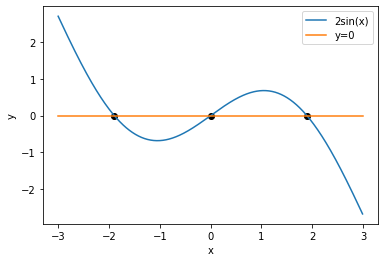

In [15]:
def f(x):
    return 2.*np.sin(x)-x

def newtonraphson(x0,dx, Nmax, eps,f): # update x0 for Nmax times until reaching eps; dx is used in the central difference scheme to calculate the derivative 
    for i in range(0,Nmax):
        df = (f(x0+dx/2)-f(x0-dx/2))/dx  # using central difference to calculate the derivative
        x0 = x0 + (-f(x0)/df) 
        if(abs(f(x0))<eps):
            print("Root is at",x0," after ",i," iterations, with a precision of ",abs(f(x0)))
            break
    return x0

eps = 1.e-8
dx=1.e-6
a=3.
nmax=100
root1 = newtonraphson(a, dx, nmax, eps, f)

eps = 1.e-8
dx=1.e-6
a=0.5
nmax=100
root2 = newtonraphson(a,dx,nmax,eps,f)

eps = 1.e-8
dx=1.e-6
a=-2
nmax=100
root3 = newtonraphson(a,dx,nmax,eps,f)

## we can verify these roots by graphing the function and seeing where it crosses the x-axis
t = np.arange(-3.0, 3.0, 0.01)
s = f(t)
plt.plot(t, s, label = '2sin(x)')
plt.scatter(root1, 0, color = 'black')
plt.scatter(root2, 0, color = 'black')
plt.scatter(root3, 0, color = 'black')
plt.ylabel('y')
plt.xlabel('x')
s2 = np.zeros(len(t))
plt.plot(t,s2, label= 'y=0')
plt.legend()
plt.show()

## Complex Step

Complex step is a second order algorithm, however differing from finite difefrence algorithms, it does not contain a step of subtraction. It is able to approximate derivatives very accurately and is able to take an extremely small input value of h. The complex derivative algorithm is represented below. 

\begin{equation}
   \frac{\partial f}{\partial x} =  \frac {IM[f(x + ih)]}{h}
\end{equation}

The introduction of complex algebra/arithmitic allows the algorithm to be more sensitive to small changes and less prone to roundoff/truncation erros. 

In [46]:
def complexderi(f, x,dx):
    return np.imag(f(x + 1j*dx))/dx

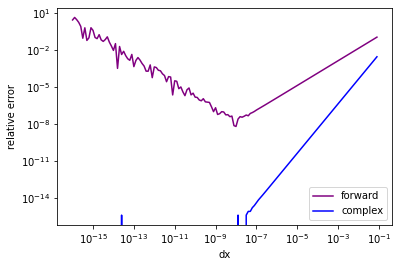

In [52]:
dxVal = [] # will hold different dx values
yVal  = [] # will hold the approximated derivative
x= 1

for dx in 10**np.arange(-16, -1, 0.1):
    y = forward(np.exp, x, dx)
    dxVal.append(dx)
    yVal.append(y)
    
dxValC= []
yValC = []
for dx in 10**np.arange(-16, -1, 0.1):
    y = complexderi(np.exp, x, dx)
    dxValC.append(dx)
    yValC.append(y)
    
plt.loglog(dxVal, abs(yVal-np.exp(1)), color = 'purple', label = 'forward')
plt.loglog(dxValC, abs(yValC-np.exp(1)), color = 'blue', label = 'complex')
plt.ylabel('relative error')
plt.xlabel('dx')
plt.legend()


# observe how the relative error for the forward-difference occurs around 10^-8
# for complex, the relative error is much smaller, occuring around 10^-16


## Cauchy Integral 

The Cauchy Integral is defined as the formula below when C is a closed curve and the function f(z) is analytic on a region containing C and its interior

\begin{equation}
    f(a) = \frac{1}{2\pi i} \oint_C \frac{f(z)}{(z-a)} \,dz
\end{equation}

The above theorem can allow the derivatives up to any order to be calculated when it is repeated. Upon repeating, the formula reworks itself into 

\begin{equation}
    f^n(a) = \frac{n!}{2\pi i} \oint_C \frac{f(z)}{(z-a)^{n+1}} \,dz
\end{equation}

The above formula is also able to be written in terms of the Gauss Median Value theorem

\begin{equation}
    \frac{1}{2\pi} \int f(a + re^{i\theta}) - f(a) \,d\theta
\end{equation}

and rearranging this for higher order gives 

\begin{equation}
    \frac{n!}{2\pi} \int f(a + e^{i\theta})e^{-ni\theta} \,d\theta
\end{equation}

In [46]:
from scipy import integrate
import numpy as np

def Cauchyd(f, a, dx, n):  
    total = 0 
    theta = 0
    twopi =np.pi*2
    
    while True:
        term1 = np.complex128(a + np.exp(1j*theta))
        term2 = np.complex128(np.exp(-1j * n * theta))
        total += f(term1) * term2 * dx
        theta += dx
        
        if theta > twopi:
            break

    return np.math.factorial(n)/(twopi) * total.real


print("f'(x)", Cauchyd(np.sin,0, 1e-5, 1))
print("f''(x)", Cauchyd(np.sin,0, 1e-5, 2))
print("f'''(x)", Cauchyd(np.sin,0, 1e-5, 3))
print("f''''(x)", Cauchyd(np.sin,0, 1e-5, 4))
print("f'''''(x)", Cauchyd(np.sin,0, 1e-5, 5))
print("f''''''(x)", Cauchyd(np.sin,0, 1e-5, 6))

f'(x) 1.0000006284847691
f''(x) 1.2569574207407705e-06
f'''(x) -0.9999962291893605
f''''(x) 1.5083361320956249e-05
f'''''(x) 1.0000754168710422
f''''''(x) 0.0004524994743973054
